# Optimizer
Gets data and uses it to optimize a method (imported from method.py) using a loss function and tests it against unseen data.
TODO:
- Cross Validation implementation


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# Import data

In [109]:
### Load the data
data_path = 'data/survey_2022-06-08.csv'
df = pd.read_csv(data_path)
df

,1. Geschlecht:,2. Alter:,3. Körpergröße (in cm),4. Körpergewicht (in kg),8. Wie lange fahren Sie schon auf dem Bus?,10. Bitte geben Sie an ob Sie sitzen oder stehen:,11. Bitte geben Sie Ihre Position im Bus an:,"12. Bitte geben Sie an, ob sie näher einer Fenster oder dem Gang sind:",clothing_insulation,comfort
0,0,62,162,60,0,0,0.0,0,31,1.000000
1,0,36,163,65,0,0,1.0,0,21,1.666667
2,0,23,168,68,1,0,2.0,0,35,1.000000
3,0,22,178,80,0,0,3.0,1,26,1.333333
4,0,25,163,65,0,0,4.0,1,26,1.333333
5,0,27,168,57,2,0,4.0,1,26,1.666667
6,1,38,187,69,0,0,5.0,0,22,1.666667
7,1,73,167,83,0,0,5.0,1,32,2.000000
8,1,61,176,80,0,0,4.0,0,29,1.333333
9,1,47,184,81,1,1,5.0,0,22,1.333333


# Scale Data

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
y = X[:,-1]
x = X[:,:-1]

# Cross Validation Split #TODO

# Train Test Split

In [111]:
from sklearn.model_selection import train_test_split
dtype = torch.float
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = torch.tensor(x_train,dtype=dtype)
x_test = torch.tensor(x_test, dtype=dtype)
y_test = torch.tensor(y_test, dtype=dtype).reshape(-1,1)
y_train = torch.tensor(y_train, dtype=dtype).reshape(-1,1)

# Train

Epoch: 0, train loss: 0.10109282284975052, test loss: 0.0427006371319294
Epoch: 100, train loss: 0.028567422181367874, test loss: 0.02464544028043747
Epoch: 200, train loss: 0.005916646681725979, test loss: 0.03105180338025093
Epoch: 300, train loss: 0.0033314654137939215, test loss: 0.04913748428225517
Epoch: 400, train loss: 0.003150430042296648, test loss: 0.05192717909812927
Epoch: 500, train loss: 0.0030920598655939102, test loss: 0.050741638988256454
Epoch: 600, train loss: 0.0030810923781245947, test loss: 0.05159830302000046
Epoch: 700, train loss: 0.003079209942370653, test loss: 0.05156176909804344
Epoch: 800, train loss: 0.003078944981098175, test loss: 0.05167005956172943
Epoch: 900, train loss: 0.0030788625590503216, test loss: 0.05171710252761841


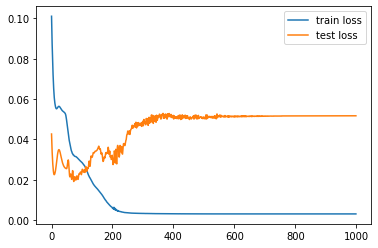

In [112]:
import time
from torch.optim.lr_scheduler import ExponentialLR
from methods import *
from torch import nn

epochs = 1000
method = NN(input_size=x_train.shape[1])
criterion = nn.MSELoss()
params_to_be_optimized = method.get_parameters()
optimizer = optim.Adam(params_to_be_optimized, lr=0.01)
scheduler = ExponentialLR(optimizer, gamma=0.999)
train_losses = []
test_losses = []

for epoch in range(epochs):
  iteration_time = time.time()
  optimizer.zero_grad()

  # forward pass
  y_train_predicted = method.predict(x_train)
  loss = criterion(y_train_predicted, y_train)

  # backward pass
  loss.backward()
  optimizer.step()
  scheduler.step()


  with torch.no_grad():

    y_train_predicted = method.predict(x_train)
    train_loss = criterion(y_train_predicted, y_train)
    train_losses.append(train_loss)

    y_test_predicted = method.predict(x_test)
    test_loss = criterion(y_test_predicted, y_test)
    test_losses.append(test_loss)

    if epoch%100==0:
      print(f'Epoch: {epoch}, train loss: {train_loss}, test loss: {test_loss}')


plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

# Test results